<a href="https://colab.research.google.com/github/RajratanWankhade/Data-Science/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

In [2]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [3]:
df.head(10)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


In [4]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


In [5]:
df.shape

(61942, 5)

In [6]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [7]:
list(df.columns)[0:3]

['date', 'state', 'fips']

# EDA

In [8]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


Cases of Deaths in the USA duen to Covid-19

<Axes: xlabel='cases', ylabel='deaths'>

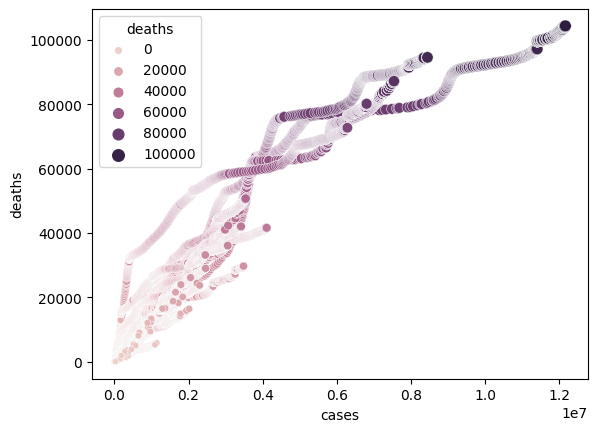

In [9]:
import seaborn as sns
sns.scatterplot(x = "cases", y ="deaths",
                hue="deaths",size="deaths",data=df)

# Date-based EDA

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index


Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

Filter results by date range

In [11]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 500)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2023-09-07
Two days ago 2022-04-25


In [12]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-04-25,Alabama,1,1299816,19545
2022-04-25,Alaska,2,249901,1209
2022-04-25,American Samoa,60,5517,12
2022-04-25,Arizona,4,2019174,29852
2022-04-25,Arkansas,5,835035,11373


<ipython-input-13-fc19846283f5>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[daybefore:today]["deaths"], shade = True)


<Axes: xlabel='deaths', ylabel='Density'>

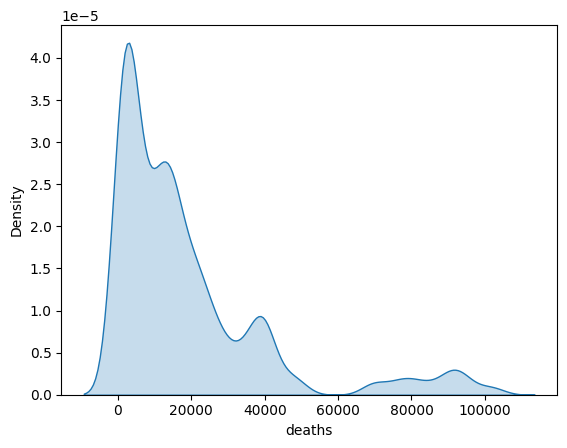

In [13]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade = True)

In [14]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths","cases"], ascending = False)

In [15]:
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-23,California,6,12169158,104277
2023-03-22,California,6,12155467,104196
2023-03-21,California,6,12154941,104185
2023-03-20,California,6,12154293,104165
2023-03-19,California,6,12153083,104130
2023-03-17,California,6,12153079,104130
2023-03-18,California,6,12153079,104130
2023-03-16,California,6,12152129,104114
2023-03-15,California,6,12136243,104047


# State Based Analysis

In [16]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California']

In [17]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [18]:
set(top_states_df.state.values)

{'California'}

In [19]:
import matplotlib.pyplot as plt


<Figure size 1500x500 with 0 Axes>

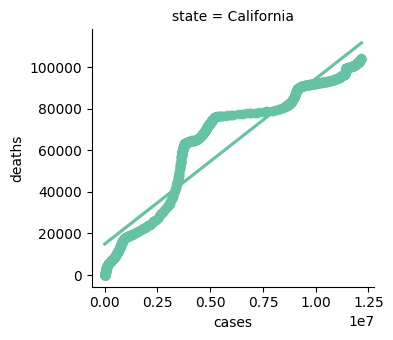

In [20]:
plt.figure(figsize=(15,5))
ax = sns.lmplot(x = "cases", y = "deaths",
                height = 3.5,

                col = "state",
                col_wrap = 5,
                hue = "state",
                palette = "Set2",
                data = top_states_df)
ax.fig.subplots_adjust(wspace=.2)


In [21]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths","cases"],ascending = True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,California,112,1
2020-03-09,California,172,2
2020-03-10,California,179,3
2020-03-11,California,202,4
2020-03-12,California,252,4


In [22]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'colab'
fig = px.scatter(top_states_march_current_df, x =top_states_march_current_df.index, y = 'cases', size = 'deaths',color='state',facet_col="state")
fig.show()

# Search for Features: Political, Health and Finance

Sugar Intake by State

In [32]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace = True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])

cdc_2013.reset_index(inplace = True)
cdc_2013.rename(columns={"state":"state", "Employed": "employed-sugar-intake-daily"},inplace = True)
cdc_2013.head()

<ipython-input-32-3e0157b0d42d>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,State,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


Combine Sugar data and Covid-19 Data


In [34]:
cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "State"]]
sugar_covid_df = df.merge(cdc_employed_df,how="inner",on="State")
sugar_covid_df.head()

KeyError: ignored